# Uvod u Pymote

Cilj ove vježbe je napraviti pregled najbitnijih komponenti paketa Pymote namjenjenog simulaciji raspodijeljenih algoritama.

Za to se koristi interaktivna konzola IPython *obavezno* pokrenuta s profilom `pymote` na slijedeći način `ipython --profile=pymote` ili pokretanjem programa `ipymote` kojim se čini ista stvar. Na taj način, između ostalog, napravljen je import najvažnijih klasa i funkcija paketa Pymote te je podešen *backend* Qt za `matplotlib` paket i grafičko sučelje.

Alternativno moguće je koristiti i ovaj notebook pokretanjem jupyter-a sa `ipython notebook --profile=pymote`.

**Napomena:** promjene u instalaciji simulatora

    pip install matplotlib==2.2.3
    pip install notebook

## Ispitivanje terena

Na početku možemo ispitati što se nudi u paketu i kako to odgovara teoriji obrađenoj u predavanju "Raspodijeljena računalna okruženja".

**Napomena:** programski kod u ovom dijelu vježbe primarno služi kao ilustracija osnovnih klasa koje sačinjavaju raspodijeljeno računalno okruženje te njihovih metoda i atributa i nije niti predviđeni niti preporučeni način korištenja simulatora.

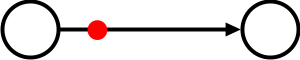

In [1]:
from IPython.display import Image
Image('images/entiteti_poruka.png')

Osnovni elementi računalnog okruženja su **entiteti** i **poruke**, a dodatna struktura koja je uvedena kroz simulator i u kojoj su grupirani entiteti je **mreža**.

In [2]:
import sys
sys.path

['C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\src\\pymote39\\pymote\\scripts',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\python39.zip',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\DLLs',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64',
 '',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\win32',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\lib\\site-pack

In [3]:
sys.path.append('C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\src\\pymote39')
sys.path.append('C:\\Users\\Krepana Krava\\Documents\\Winpython64-3.9.10\\WPy64-39100\\python-3.9.10.amd64\\Lib\\site-packages')

In [4]:
print(sys.version)


3.9.10 (tags/v3.9.10:f2f3f53, Jan 17 2022, 15:14:21) [MSC v.1929 64 bit (AMD64)]


### Entiteti

Entiteti se u simulatoru nazivaju **čvorovi** i predstavljeni su instancama klase `Node`.

In [5]:
# wildcard import se inače ne preporuča koristiti no kako je cilj upoznati sve komponente paketa u ovom kontekstu je to u redu
from pymote import *

node = Node()

WARNING [__init__.py]: Environment variable PYMOTE_SETTINGS_MODULE is undefined, using global_settings.


Memorija $M_x$ čvora $x$ je implementirana kroz atribut `memory`, a koji je običan python `dict` te omogućava osnovnu predviđenu funkcionalnost: spremanje proizvoljnih informacija odnosno podataka u pojedine registre odnosno ključeve.

In [6]:
node.memory

{}

Jedan od posebnih registara je u simulatoru izdvojen iz memorije, a to je statusni registar $\text{status}(x) \in \mathcal{S}$ i to je prema tipu podataka običan `string`.

In [7]:
node.status = ""

Čvoru je prilikom instanciranja dodjeljen jedinstveni identifikacijski broj ili `id`:

In [8]:
node.id

1

Čvor ima posebne atribute `inbox` i `outbox` koji se koriste za primitak i slanje poruka, trenutno su prazni.

In [9]:
print(node.inbox)
print(node.outbox)

[]
[]


U pythonu, instance i njihovi atributi i metode se mogu dohvatiti funkcijom `dir` (introspekcija). Više informacija se može pronaći u dokumentaciji paketa, a ponekad i sam izvorni kôd jasno otkriva svrhu pojedine metode. 

In [10]:
#node.reset??

Čvor trenutno nije dio nijedne mreže. Indikacija toga je što atribut `network` nije postavljen:

In [11]:
node.network is None

True

### Mreža

Stvorimo praznu mrežu te možemo dodati ranije stvoreni čvor u nju.

In [12]:
net = Network()

In [13]:
from networkx import Graph

In [14]:
#Graph.add_node()
#print(Graph.nodes(data=False))

In [15]:
net.add_node(node)

Node 1 is placed on position [216.60402268 517.66114164].


<Node id=1>

Sada čvor ima postavljen atribut `network`:

In [16]:
node.network

Veza je dvosmjerna, odnosno i mreža 'zna' koji čvorovi su dio mreže:

In [17]:
net.nodes()

NodeView((<Node id=1>,))

Ako ne specificiramo čvor koji se dodaje, metoda sama stvara novi.

In [18]:
net.add_node()

Node 2 is placed on position [ 52.68119027 158.87003176].


<Node id=2>

In [19]:
net.nodes()

NodeView((<Node id=1>, <Node id=2>))

U metodi `add_node` može se specificirati i pozicija čvora no ako ona nije specificirana dodijeljuju se nasumično odabrane pozicije (lokacija i orijentacija). Trenutno dodjeljene lokacije mogu se pronaći u atributu `pos`, a orijentacije u atributu `ori`:

In [20]:
net.pos

{<Node id=1>: array([216.60402268, 517.66114164]),
 <Node id=2>: array([ 52.68119027, 158.87003176])}

In [21]:
net.ori

{<Node id=1>: 3.142573232983901, <Node id=2>: 4.056114431323393}

Pozicije se biraju unutar *default*nog okruženja mreže odnosno 2D prostora veličine 600x600 koji je specificiran atributom `environment`.

In [22]:
net.environment

U slučaju 2D environmenta to je numpy 2d polje U kojem je sa 255 predstavljen prazan prostor, a sa vrijednostima manjim od 255 prepreke.

In [23]:
net.environment.im

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [24]:
net.environment.im.shape

(600, 600)

In [25]:
# podrska za iscrtavanje izravno u notebooku
%matplotlib inline

C:\Users\Krepana Krava\Documents\Winpython64-3.9.10\WPy64-39100\python-3.9.10.amd64\src\pymote39\pymote\network.py:206: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


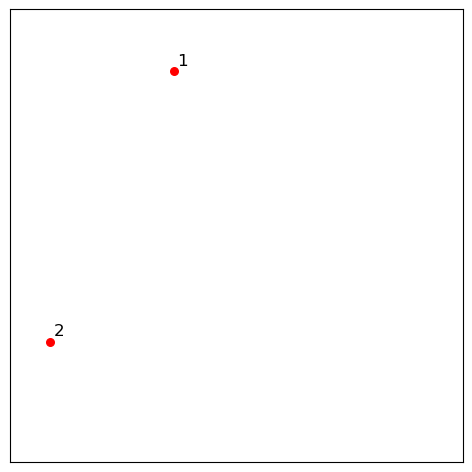

In [26]:
net.show()

Ukoliko čvorovi nisu povezani to je zbog ograničenog komunikacijskog dometa svakog od njih.

In [27]:
node.commRange

100

In [28]:
for node in net.nodes():
    node.commRange = 600
net.recalculate_edges()

Sa povećanim dometom trebali bi dobiti brid u grafu odnosno mogućnost komunikacije.

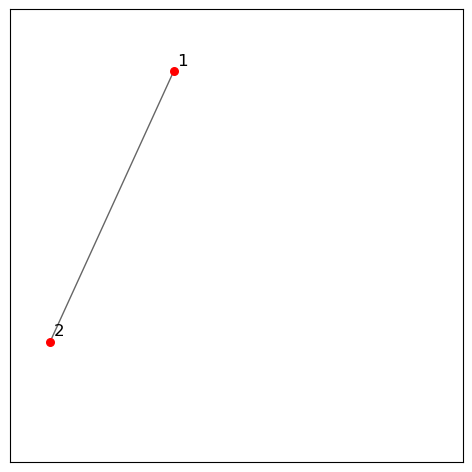

In [29]:
net.show()

### Poruke

Poruke u raspodijeljenom računalnom okruženju su po definiciji nizovi bitova koji su u simulatoru predstavljeni kao intance klase `Message`.

In [30]:
from pymote.message import Message
message = Message()

In [31]:
message


------ Message ------ 
     source = None 
destination = Broadcasted 
     header = '' 
id(message) = 0x1d6b7fc6b80>

Za slanje poruke koristi se metoda `send`:

In [32]:
node.send(message)

Metoda `send` je poruku prebacila u outbox listu čvora.

In [33]:
node.outbox

[
 ------ Message ------ 
      source = <Node id=2> 
 destination = Broadcasted 
      header = '' 
 id(message) = 0x1d6b7fc1160>]

Primijetite kako su podaci zapisani u poruku samim izvršenjem metode `send` osvježeni. Preciznije u ovom slučaju polje `source` je poprimilo odgovarajuću vrijednost.

In [34]:
net.communicate()

Sam čin komunikacije odnosno prebacivanja svih poruka iz polaznih u odredišne čvorove (susjede) je pod kontrolom mreže i obavlja se njenom metodom `communicate`. Ovaj dio se obično odvija automatizmom u svakom koraku simulacije, no o tome više u daljnjem tekstu.

Mreža, u ovisnosti o ograničenjima, može poruku ili zadržati određeni broj koraka ili isporučiti odmah u slijedećem koraku što je i *default* ponašanje.

Poruka više nije u `outbox`-u polazišnog čvora:

In [35]:
node.outbox

[]

Nalazi se u `inbox`-u odredišnog čvora ili čvorova:

In [36]:
other_node = net.nodes()[0]

KeyError: 0

In [ ]:
other_node.inbox

## 'Hello distributed world'

U ovom primjeru analiziramo implementaciju jednog od najjednostavnijih algoritama pod imenom `Flood`, a koji riješava problem *Broadcast*. Cilj algoritma je podijeliti informaciju koju posjeduje jedan čvor ostalim čvorovima u mreži.

### Kreiranje mreže

Mreža kao osnovna struktura može se kreirati na više načina. U većini slučajeva sasvim dovoljno je koristiti klasu `NetworkGenerator` kojoj se prilikom instanciranja pridruže željeni parametri kao što su broj čvorova (točan, maksimalan, minimalan) prosječan broj susjeda itd... 

U ovom primjeru jedini parametar koji se želi imati pod kontrolom je broj čvorova, a iznosi 100:

In [ ]:
net_gen = NetworkGenerator(100)

Za detaljan opis opcija pogledati pymote dokumentaciju za klasu [NetworkGenerator](https://pymote.readthedocs.org/en/latest/reference/networkgenerator.html).

Nakon toga možemo koristiti metode generatora kako bi izradili nove mreže s željenim parametrima, primjerice za nasumičan raspored čvorova koristi se metoda `generate_random_network()`:

In [ ]:
net = net_gen.generate_random_network()

Metoda kao rezultat vraća željenu mrežu odnosno instancu klase `Network`:

In [ ]:
net.show()

### Algoritam

Algoritam `Flood` dio je modula `broadcast` te ukoliko ga želimo koristiti moramo ga uvesti:

In [ ]:
from pymote.algorithms.broadcast import Flood

i pridružiti mreži:

In [ ]:
net.algorithms = ( (Flood, {'informationKey': 'I'}), )

Kod pridruživanja algoritama mreži potrebno je primjetiti nekoliko stvari:

* pojedini algoritam je torka odn. `tuple` od dva elementa u kojem je prvi klasa algoritma, u ovom slučaju `Flood`, a drugi je `dict` koji se sastoji od parametara
    * npr. `Flood` prima kao obavezni parametar ključ pod kojim će čvorovi u svojoj memoriji spremati informaciju koja se želi podijeliti
* algoritmi se pridružuju kao elementi torke, a kako u ovom primjeru se pridružuje samo jedan algoritam potrebno je iza njega dodati zarez kako bi Python stvorio torku od jednog elementa
    * primjerice `(1)` je `int`, ali `(1, )` je `tuple`

Algoritam zahtijeva postojanje barem jednog čvora koji ima informaciju, odn. inicijatora. Kako bi to bilo osigurano jednom od čvorova se ta informacija treba upisati u memoriju prije pokretanja samog algoritma:

In [ ]:
some_node = net.nodes()[0]                         # uzimamo prvi čvor u listi čvorova mreže
some_node.memory['I'] = 'Hello distributed world'  # pod ključem 'I' upisujemo informaciju

### Simulacija

Nakon definicije mreže i pridruživanja algoritma potrebno je pokrenuti simulaciju. Simulaciji se pri instanciranju kao argument šalje mreža nad kojom se želi obaviti simulacija:

In [ ]:
sim = Simulation(net)

Ostaje još samo i pokrenuti simulaciju:

In [ ]:
sim.run()

Nakon što je završilo izvršavanje algoritama pogledajmo ako je informacija uspješno podijeljena tako što ćemo ispisati sadržaj memorije čvorova:

In [ ]:
for node in net.nodes():
    print node.id, node.memory['I']

Kako bi tijekom izvršavanja simulacije informacija o stanju u kojem se nalazi mreža bila potpuna prati se i trenutno stanje algoritma:

In [ ]:
net.algorithmState

U ovom slučaju algoritam pod indeksom 0 odnosno `Flood` je završio (`'finished': True`), uz navedeni trenutni broj koraka `step`.

Ako se želi ponovno pokrenuti simulacija potrebno ju je resetirati:

In [ ]:
sim.reset()

čime se:

* stanje algoritama mreže postavlja na početno:

In [ ]:
net.algorithmState

* te se uz to briše i sva memorija čvorova:

In [ ]:
for node in net.nodes():
    print node.memory,

In [ ]:
some_node.memory['I'] = 'Hello again'
sim.run()

## Analiza algoritma

Algoritam *Flood* je vrlo jednostavan i u cijelosti je definiran na slijedeći način:

$initiator \times \iota \longrightarrow \text{Process}(I);\; {\bf\text{send}}(I) \to N(x);\; {\bf\text{become}}\; \text{done}$

$idle \times \text{Receiving}(I) \longrightarrow \text{Process}(I);\; {\bf\text{send}}(I) \to N(x) - {\bf\text{sender}};\; {\bf\text{become}}\; \text{done}$

Pogledajmo kod za modul `pymote.algorithms.broadcast` u kojem se nalazi algoritam `Flood`:

In [ ]:
from pymote.algorithm import NodeAlgorithm
from pymote.message import Message



class Flood(NodeAlgorithm):
    required_params = ('informationKey', )
    default_params = {'neighborsKey': 'Neighbors'}

    def initializer(self):
        ini_nodes = []
        for node in self.network.nodes():
            node.memory[self.neighborsKey] = node.compositeSensor.read()['Neighbors']
            node.status = 'IDLE'
            
            if node.memory.has_key(self.informationKey):
                node.status = 'INITIATOR'
                ini_nodes.append(node)
                
        for ini_node in ini_nodes:
            self.network.outbox.insert(0, Message(
                header=NodeAlgorithm.INI,
                destination=ini_node
            ))

    def initiator(self, node, message):
        if message.header == NodeAlgorithm.INI:
            node.send(Message(
                header='Information',  # default destination: send to every neighbor
                data=node.memory[self.informationKey]
            ))
            node.status = 'DONE'

    def idle(self, node, message):
        if message.header == 'Information':
            node.memory[self.informationKey] = message.data
            destination_nodes = list(node.memory[self.neighborsKey])
            destination_nodes.remove(message.source)  # send to every neighbor-sender
            
            if destination_nodes:
                node.send(Message(
                    destination=destination_nodes,
                    header='Information',
                    data=message.data
                ))
                
        node.status = 'DONE'

    def done(self, node, message):
        pass

    STATUS = {
        'INITIATOR': initiator,
        'IDLE': idle,
        'DONE': done,
    }

## Osnovne komponente

U ovom dijelu opisane su osnovne komponente Pymote paketa te njihov međusoban odnos.

In [ ]:
from IPython.display import Image
Image(filename='images/pymote_class_diagram.png')

### Graf

Pymote paket se zasniva djelomično na proširenju mogućnosti paketa [NetworkX](http://networkx.lanl.gov/index.html). Dodirna točka je klasa [Graph](http://networkx.github.io/documentation/latest/reference/classes.html) koja predstavlja neusmjereni graf.

In [ ]:
from networkx import Graph
g = Graph()

`Graph` definira:

* vrhove grafa `Graph.node` -`dict` u kojem su ključevi vrhovi odnosno bilo kakvi *immutable/hashable* python objekti, a vrijednosti njihovi (opcionalni) atributi

In [ ]:
g.add_nodes_from([1, 2, 3, 4, 5, 6])
g.node

* bridove grafa `Graph.adj` ili `Graph.edge` (isti objekt) - `dict` u kojem su ključevi vrhovi, a vrijednost za pojedini vrh je `dict` čiji su ključevi vrhovi susjedi zadanog vrha, a vrijednosti su (opcionalni) atributi brida

In [ ]:
g.add_edges_from([(1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (1, 6), (5, 2)])
print g.edge is g.adj
g.edge

* razne metode za manipulaciju strukturom grafa

In [ ]:
g.add_star(g.nodes())  # povezuje prvi cvor sa svim ostalima
g.edge

* [funkcije za iscrtavanje](http://networkx.github.io/documentation/latest/reference/drawing.html)

In [ ]:
from networkx import draw_networkx
draw_networkx(g)

* [algoritme](http://networkx.github.io/documentation/latest/reference/algorithms.html), kao npr. [shortest_path](http://networkx.github.io/documentation/latest/reference/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html)

In [ ]:
from networkx.algorithms import shortest_path
shortest_path(g, 2, 6)

Dodatno NetworkX paket sadrži i:

* druge tipove grafova (usmjereni, multigraf...) 

In [ ]:
from networkx import DiGraph
dg = DiGraph([(1,2),(2,1),(1,3),(3,2)])
draw_networkx(dg)

* [generatore grafova](http://networkx.github.io/documentation/latest/reference/generators.html), kao npr. [hypercube_graph](http://networkx.github.io/documentation/latest/reference/generated/networkx.generators.classic.hypercube_graph.html#networkx.generators.classic.hypercube_graph)

In [ ]:
from networkx.generators.classic import hypercube_graph
hcg = hypercube_graph(3)
draw_networkx(hcg)

 * [konvertere](http://networkx.github.io/documentation/latest/reference/convert.html) itd.

In [ ]:
import numpy
mat = numpy.random.random((6, 6)) > 0.5
print mat
from networkx.convert_matrix import from_numpy_matrix
g = from_numpy_matrix(mat)
draw_networkx(g)

### Mreža

`Network` je osnovna klasa Pymote simulatora. Njene instance sadrže sve informacije potrebne kako bi se za pojedinu mrežu pokrenula ili nastavila simulacija njoj pripadajućih algoritama. Kao što je već naglašeno klasa `Network` je podklasa (podrazred) klase Graph iz paketa NetworkX. 

Uz sve postojeće značajke networkx grafa, Pymote u klasi `Network` proširuje mogućnosti sa slijedećim atributima i funkcionalnostima:

* `Network.environment` - trenutno je omogućeno samo 2D okruženje, kroz instancu klase `Environment2D`

In [ ]:
from pymote.environment import Environment2D
o_env = Environment2D(path='images/o_shape.png')
c_env = Environment2D(path='images/c_shape.png')
o_net = Network(environment=o_env)
c_net = Network(environment=c_env)
for _ in range(100):
    o_net.add_node()
    c_net.add_node()
o_net.show()
c_net.show()

* `Network.pos` - lokacija čvorova u okruženju

* `Network.ori` - orijentacija čvorova u okruženju

* `Network.algorithms` - torka algoritama: svi čvorovi izvršavaju iste algoritme, pa je mreža adekvatno mjesto za definiciju

In [ ]:
net.algorithms

* `Network.channelType` - model komunikacijskog kanala

In [ ]:
net.channelType

In [ ]:
from pymote.channeltype import Udg, SquareDisc
from numpy import mean
import matplotlib.pyplot as plt

udg = Udg(net.environment)
scd = SquareDisc(net.environment)
udg_cr = []
scd_cr = []
distances = range(1, 201, 10)
net = Network()
node1 = net.add_node(pos=(0, 0))
for distance in distances:
    node2 = net.add_node(pos=[0, distance])
    udg_cr.append(mean(map(lambda x: udg.in_comm_range(net, node1, node2), range(100))))
    scd_cr.append(mean(map(lambda x: scd.in_comm_range(net, node1, node2), range(100))))
plt.ylim(0, 1.1)
plt.xlabel("Udaljenost")
plt.ylabel("Vjerojatnost ostvarivanja komunikacije")
plt.plot(distances, udg_cr)
plt.plot(distances, scd_cr)


* model komunikacije kroz `Network.outbox` i `Network.communicate()`

Mreža je središnji objekt u Pymote paketu i ona sadrži sve potrebne informacije kako bi se rekreirao eksperiment ili sačuvali podaci za kasniju analizu. Shodno tome implementirane su metode za njeno spremanje i čitanje s diska:

In [ ]:
write_pickle(net, 'mreza1.tar.gz')
net_from_file = read_pickle('mreza1.tar.gz') 
net_from_file

In [ ]:
# ukoliko je potrebno može se koristiti i
# %debug

### Algoritmi

Pymote podržava dva tipa algoritama raspodijeljeni i centralizirani:

* *Centralizirani* algoritmi se implementiraju kao podklase od `NetworkAlgorithm` i funkcioniraju po prinicipu izravnog upisivanja podataka u memoriju čvorova.
* *Raspodijeljeni* algoritmi se implementiraju kao podklase od `NodeAlgorithm`. Raspodijeljeni algoritmi mogu koristiti samo informacije spremljene u samoj memoriji čvora te one dobivene očitanjem osjetila koje pojeduje čvor.

### Čvorovi

Čvorovi su instance klase `Node` koja između ostalog implementira slijedeće atribute i metode:

* `memory` - `dict` u kojem čvor čuva cjelokupno znanje koje može prikupiti na dva načina:
 * očitanje osjetila - npr. polje `Neighbors` u algoritmu `Flood`
 * informacije u primljenim porukama - npr. polje `I` u algoritmu `Flood`

In [ ]:
# some_node je cvor iz mreze u kojoj je izvrsen algoritam Flood
some_node.memory['Neighbors']

In [ ]:
some_node.memory['I']

* `status` - registar u memoriji s posebnim značenjem za raspodijeljene algoritme implementiran je kao poseban atribut

In [ ]:
some_node.status

* `commRange` - komunikacijski domet čvora: u kombinaciji s pozicijom, okruženjem i modelom kominikacijskog kanala određuje susjede pojedinog čvora

In [ ]:
some_node.commRange

* `outbox` i `_inbox` - liste u kojima su spremeljene poruke (instance klase `Message`) spremene za slanje odnosno primljene poruke
* `send()` - metoda za slanje poruka drugim čvorovima
* `compositeSensor` - predstavlja torku osjetila koji su instalirani na čvoru te implementira metodu `read()` koja vraća `dict` s ključevima koji odgovaraju pojedinom osjetilu, a vrijednosti su njihova trenutna očitanja

In [ ]:
print some_node.compositeSensor
print some_node.compositeSensor.sensors
some_node.compositeSensor.read()

### Osjetila

Osjetila predstavljaju sučelje čvora prema okolini. Impelentirani su kao podklase apstraktne klase `Sensor`. Implementiraju metodu `read()` koja u ovisnosti o osjetilu može svoje podatke dobiti uvidom u mrežu odnosno okruženje.

In [ ]:
from pymote.sensor import TruePosSensor
new_net = Network()

node = new_net.add_node(pos=[100, 100])
node.compositeSensor = (TruePosSensor, 'DistSensor')

new_net.add_node(pos=[170, 170])
node.compositeSensor.read()

Zgodno je primjetiti kako je prvo osjetilo pridruženo kao klasa, a drugo samo imenom klase. I jedna i druga opcija su moguće.

Pojedino osjetilo može implementirati atribut `probabilityFunction` koji mu omogućava 'zašumljivanje' dobivenih podataka kako bi očitanje bilo bliže realnom očitanju koje je u većini slučajeva podložno manjim ili većim mjernim nesigurnostima.

In [ ]:
dist_sensor = node.compositeSensor.sensors[0]
dist_sensor.probabilityFunction.pf

In [ ]:
distances = []
for i in range(1000):
    distances.append(node.compositeSensor.read()['Dist'].values()[0])
h = plt.hist(distances,bins=30)

Osjetila koje određeni čvor posjeduje mogu promijeniti njegovu ulogu unutar pojeding algoritma. Primjerice kod algoritma lokalizacije čvor s `TruePos` osjetilom predstavlja sidro.

Osjetila služe i kako bi se implementirala određene pretpostavke, nazvane još i ograničenja algoritma. Primjerice, ukoliko algoritam zahtijeva za svaki čvor poznavanje svojih susjeda tada se u svakom čvoru postavlja osjetilo `NeighborsSensor` čijim očitanjem čvor u svakom trenutku može 'očitati' svoje susjede.

### Simulacija

Klasa `Simulation` se brine za izvršavanje algoritma u pripadajućoj mreži `Simulation.network`.

Između ostalog, brine se i za osvježavanje grafičkog sučelja simulatora. 

<!--- Definirana je kao dretva (*thread*) odnosno podklasa od klase `QtCore.QThread` paketa Pyside.
-->

### Postavke

Kako bi rad u interaktivnoj konzoli, grafičkom sučelji ili u automatiziranim eksperimentima bio olakšan potrebno je preddefinirati određene vrijednosti. Takve vrijednosti definiraju se u postavkama `pymote.conf.settings`.

Trenutne globalne postavke:

In [ ]:
"""Default pymote settings.

Override these with settings in the module pointed-to by the 
PYMOTE_SETTINGS_MODULE environment variable or by using 
settings.configure(**settings) or settings.load('path.to.settings')

"""

import scipy.stats 
from numpy import pi

###########
# NETWORK #
###########
ENVIRONMENT = 'Environment2D'
ENVIRONMENT2D_SHAPE = (600,600)


ALGORITHMS = ()
#ALGORITHMS = ((ReadSensors,
#               {'sensorReadingsKey':'sensorReadings'}),
#              )

CHANNEL_TYPE = 'Udg'




##########
#  NODE  #
##########
SENSORS = ('NeighborsSensor', )
#SENSORS = ('AoASensor','DistSensor')
ACTUATORS = ()
COMM_RANGE = 100

AOA_PF_PARAMS = {'pf': scipy.stats.norm,
                 'scale':10*pi/180} # in radians
DIST_PF_PARAMS = {'pf': scipy.stats.norm,
                 'scale':10}


Postavke se mogu promijeniti odnosno prepisati (*override*-ati) na nekoliko načina:

* pisanjem novog modula settings.py na kojeg se referencira *environment* varijabla `PYMOTE_SETTINGS_MODULE` u npr. `paket.podpaket.settings`
* prije prvog korištenja postavki one se mogu promijeniti korištenjem `settings.configure(**settings)` ili
* korištenjem `settings.load('paket.podpaket.settings')` u bilo kojem trenutku

## GUI

Grafičko sučelje simulatora pokreće se:

1. u *standalone* verziji korištenjem instaliranog programa `pymote-simgui`
2. iz interaktivne konzole sa `%run pymote/gui/simulationgui.py`

Prednost druge metode je u tome što se paralelno sa sučeljem u konzoli može pristupiti svim objektima koristeći objekt `simgui` npr. `simgui.net` predstavlja mrežu koja je trenutno u sučelju.